## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              111.4
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   1.50e-122
Time:                        16:08:09   Log-Likelihood:                         -256.74
No. Observations:                 404   AIC:                                      539.5
Df Residuals:                     391   BIC:                                      591.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

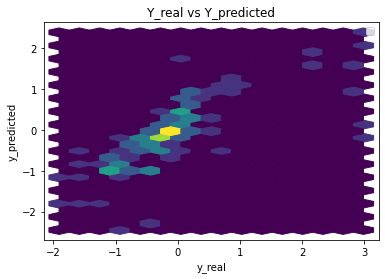

Performance Metrics
Mean Squared Error: 0.48332750006675856
Mean Absolute Error: 0.44812404081385454
Manhattan distance: 45.708652163013156
Euclidean distance: 7.021353502481511


Stats Model MAE 0.44812404081385454


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548


0:	learn: 0.9674248	total: 159ms	remaining: 2m 38s
1:	learn: 0.9458189	total: 164ms	remaining: 1m 21s
2:	learn: 0.9245551	total: 167ms	remaining: 55.6s
3:	learn: 0.9059497	total: 171ms	remaining: 42.6s
4:	learn: 0.8882130	total: 174ms	remaining: 34.6s
5:	learn: 0.8704004	total: 179ms	remaining: 29.7s
6:	learn: 0.8517789	total: 182ms	remaining: 25.8s


7:	learn: 0.8345427	total: 185ms	remaining: 22.9s
8:	learn: 0.8181885	total: 188ms	remaining: 20.7s
9:	learn: 0.8010276	total: 192ms	remaining: 19s
10:	learn: 0.7858688	total: 195ms	remaining: 17.5s
11:	learn: 0.7697717	total: 198ms	remaining: 16.3s
12:	learn: 0.7541858	total: 203ms	remaining: 15.4s
13:	learn: 0.7383669	total: 206ms	remaining: 14.5s
14:	learn: 0.7256705	total: 208ms	remaining: 13.7s
15:	learn: 0.7112544	total: 211ms	remaining: 13s
16:	learn: 0.6991061	total: 214ms	remaining: 12.4s
17:	learn: 0.6861659	total: 218ms	remaining: 11.9s
18:	learn: 0.6732805	total: 221ms	remaining: 11.4s
19:	learn: 0.6616424	total: 223ms	remaining: 10.9s
20:	learn: 0.6489349	total: 226ms	remaining: 10.5s
21:	learn: 0.6374916	total: 230ms	remaining: 10.2s
22:	learn: 0.6266986	total: 234ms	remaining: 9.92s
23:	learn: 0.6161857	total: 237ms	remaining: 9.64s
24:	learn: 0.6054958	total: 240ms	remaining: 9.36s
25:	learn: 0.5954260	total: 243ms	remaining: 9.11s
26:	learn: 0.5862207	total: 248ms	rema

28:	learn: 0.5678951	total: 284ms	remaining: 9.5s
29:	learn: 0.5585277	total: 286ms	remaining: 9.26s


30:	learn: 0.5488164	total: 293ms	remaining: 9.17s
31:	learn: 0.5409648	total: 296ms	remaining: 8.96s
32:	learn: 0.5340387	total: 301ms	remaining: 8.83s
33:	learn: 0.5261133	total: 308ms	remaining: 8.74s
34:	learn: 0.5187791	total: 327ms	remaining: 9.02s
35:	learn: 0.5111903	total: 332ms	remaining: 8.9s
36:	learn: 0.5047735	total: 335ms	remaining: 8.71s
37:	learn: 0.4981562	total: 341ms	remaining: 8.63s
38:	learn: 0.4907509	total: 344ms	remaining: 8.48s
39:	learn: 0.4831054	total: 347ms	remaining: 8.32s
40:	learn: 0.4778331	total: 352ms	remaining: 8.24s


41:	learn: 0.4714639	total: 360ms	remaining: 8.22s
42:	learn: 0.4660869	total: 367ms	remaining: 8.17s
43:	learn: 0.4600626	total: 377ms	remaining: 8.19s
44:	learn: 0.4535079	total: 380ms	remaining: 8.07s


45:	learn: 0.4481918	total: 386ms	remaining: 8.01s
46:	learn: 0.4433198	total: 391ms	remaining: 7.93s
47:	learn: 0.4372854	total: 396ms	remaining: 7.86s
48:	learn: 0.4328559	total: 401ms	remaining: 7.78s
49:	learn: 0.4282411	total: 405ms	remaining: 7.7s
50:	learn: 0.4227969	total: 412ms	remaining: 7.66s
51:	learn: 0.4182805	total: 416ms	remaining: 7.59s
52:	learn: 0.4145388	total: 422ms	remaining: 7.53s
53:	learn: 0.4109361	total: 424ms	remaining: 7.43s
54:	learn: 0.4067674	total: 429ms	remaining: 7.37s
55:	learn: 0.4027328	total: 436ms	remaining: 7.35s
56:	learn: 0.3983548	total: 460ms	remaining: 7.61s


57:	learn: 0.3946480	total: 485ms	remaining: 7.88s
58:	learn: 0.3910475	total: 488ms	remaining: 7.78s


59:	learn: 0.3878046	total: 491ms	remaining: 7.69s
60:	learn: 0.3839281	total: 494ms	remaining: 7.61s
61:	learn: 0.3806377	total: 498ms	remaining: 7.53s
62:	learn: 0.3781924	total: 501ms	remaining: 7.46s
63:	learn: 0.3753967	total: 529ms	remaining: 7.74s
64:	learn: 0.3728941	total: 535ms	remaining: 7.69s
65:	learn: 0.3694962	total: 548ms	remaining: 7.76s
66:	learn: 0.3662065	total: 553ms	remaining: 7.71s
67:	learn: 0.3637277	total: 559ms	remaining: 7.66s
68:	learn: 0.3607185	total: 563ms	remaining: 7.59s
69:	learn: 0.3587081	total: 566ms	remaining: 7.52s
70:	learn: 0.3557257	total: 569ms	remaining: 7.45s
71:	learn: 0.3532857	total: 576ms	remaining: 7.42s
72:	learn: 0.3511813	total: 580ms	remaining: 7.37s
73:	learn: 0.3481395	total: 588ms	remaining: 7.35s
74:	learn: 0.3456122	total: 591ms	remaining: 7.29s
75:	learn: 0.3434933	total: 595ms	remaining: 7.24s


76:	learn: 0.3402474	total: 600ms	remaining: 7.2s
77:	learn: 0.3378189	total: 604ms	remaining: 7.14s


78:	learn: 0.3356711	total: 607ms	remaining: 7.08s
79:	learn: 0.3339300	total: 612ms	remaining: 7.03s
80:	learn: 0.3318282	total: 615ms	remaining: 6.97s
81:	learn: 0.3295309	total: 618ms	remaining: 6.92s
82:	learn: 0.3280360	total: 644ms	remaining: 7.12s
83:	learn: 0.3263128	total: 661ms	remaining: 7.21s
84:	learn: 0.3241842	total: 664ms	remaining: 7.15s
85:	learn: 0.3230860	total: 666ms	remaining: 7.08s
86:	learn: 0.3216202	total: 668ms	remaining: 7.01s
87:	learn: 0.3196660	total: 672ms	remaining: 6.97s
88:	learn: 0.3175677	total: 674ms	remaining: 6.9s
89:	learn: 0.3156515	total: 676ms	remaining: 6.83s
90:	learn: 0.3140005	total: 680ms	remaining: 6.79s
91:	learn: 0.3122959	total: 681ms	remaining: 6.72s
92:	learn: 0.3104281	total: 684ms	remaining: 6.67s
93:	learn: 0.3089513	total: 687ms	remaining: 6.63s
94:	learn: 0.3072772	total: 689ms	remaining: 6.57s
95:	learn: 0.3067211	total: 691ms	remaining: 6.51s
96:	learn: 0.3056730	total: 693ms	remaining: 6.46s
97:	learn: 0.3043762	total: 698m

103:	learn: 0.2957297	total: 716ms	remaining: 6.17s
104:	learn: 0.2941299	total: 719ms	remaining: 6.13s


105:	learn: 0.2925930	total: 721ms	remaining: 6.08s
106:	learn: 0.2911016	total: 731ms	remaining: 6.1s


107:	learn: 0.2892409	total: 826ms	remaining: 6.82s
108:	learn: 0.2881816	total: 832ms	remaining: 6.8s
109:	learn: 0.2873256	total: 837ms	remaining: 6.77s
110:	learn: 0.2859975	total: 843ms	remaining: 6.75s
111:	learn: 0.2847766	total: 850ms	remaining: 6.74s
112:	learn: 0.2835808	total: 856ms	remaining: 6.72s
113:	learn: 0.2824130	total: 896ms	remaining: 6.96s
114:	learn: 0.2813255	total: 898ms	remaining: 6.91s
115:	learn: 0.2807018	total: 907ms	remaining: 6.91s
116:	learn: 0.2795704	total: 910ms	remaining: 6.87s
117:	learn: 0.2786571	total: 916ms	remaining: 6.84s
118:	learn: 0.2775313	total: 925ms	remaining: 6.85s
119:	learn: 0.2766041	total: 930ms	remaining: 6.82s
120:	learn: 0.2756538	total: 934ms	remaining: 6.79s


121:	learn: 0.2750347	total: 939ms	remaining: 6.75s
122:	learn: 0.2739935	total: 941ms	remaining: 6.71s
123:	learn: 0.2729764	total: 948ms	remaining: 6.7s
124:	learn: 0.2720744	total: 952ms	remaining: 6.66s
125:	learn: 0.2715005	total: 957ms	remaining: 6.63s
126:	learn: 0.2703859	total: 960ms	remaining: 6.6s
127:	learn: 0.2692875	total: 971ms	remaining: 6.62s
128:	learn: 0.2681965	total: 974ms	remaining: 6.58s
129:	learn: 0.2671571	total: 976ms	remaining: 6.53s
130:	learn: 0.2663555	total: 979ms	remaining: 6.5s
131:	learn: 0.2654486	total: 982ms	remaining: 6.46s
132:	learn: 0.2649280	total: 986ms	remaining: 6.42s
133:	learn: 0.2641104	total: 988ms	remaining: 6.39s
134:	learn: 0.2631997	total: 992ms	remaining: 6.36s
135:	learn: 0.2625132	total: 995ms	remaining: 6.32s
136:	learn: 0.2617917	total: 998ms	remaining: 6.29s


137:	learn: 0.2608175	total: 1.21s	remaining: 7.55s
138:	learn: 0.2596729	total: 1.22s	remaining: 7.54s
139:	learn: 0.2587083	total: 1.22s	remaining: 7.51s
140:	learn: 0.2580238	total: 1.23s	remaining: 7.48s
141:	learn: 0.2574907	total: 1.23s	remaining: 7.45s
142:	learn: 0.2567374	total: 1.24s	remaining: 7.41s
143:	learn: 0.2557571	total: 1.24s	remaining: 7.37s
144:	learn: 0.2552286	total: 1.24s	remaining: 7.33s
145:	learn: 0.2545312	total: 1.25s	remaining: 7.29s
146:	learn: 0.2535485	total: 1.25s	remaining: 7.26s
147:	learn: 0.2527261	total: 1.25s	remaining: 7.22s
148:	learn: 0.2519554	total: 1.26s	remaining: 7.19s
149:	learn: 0.2514897	total: 1.26s	remaining: 7.15s
150:	learn: 0.2507690	total: 1.27s	remaining: 7.12s
151:	learn: 0.2498923	total: 1.27s	remaining: 7.08s
152:	learn: 0.2493728	total: 1.27s	remaining: 7.05s
153:	learn: 0.2489564	total: 1.28s	remaining: 7.01s
154:	learn: 0.2482922	total: 1.28s	remaining: 6.97s
155:	learn: 0.2473277	total: 1.28s	remaining: 6.94s
156:	learn: 

175:	learn: 0.2368424	total: 1.38s	remaining: 6.48s
176:	learn: 0.2365121	total: 1.39s	remaining: 6.46s
177:	learn: 0.2360216	total: 1.39s	remaining: 6.43s
178:	learn: 0.2354643	total: 1.39s	remaining: 6.4s
179:	learn: 0.2349330	total: 1.4s	remaining: 6.37s
180:	learn: 0.2341016	total: 1.4s	remaining: 6.35s
181:	learn: 0.2332821	total: 1.41s	remaining: 6.32s
182:	learn: 0.2329092	total: 1.41s	remaining: 6.29s
183:	learn: 0.2325624	total: 1.41s	remaining: 6.26s
184:	learn: 0.2314739	total: 1.42s	remaining: 6.24s
185:	learn: 0.2311530	total: 1.42s	remaining: 6.22s
186:	learn: 0.2302845	total: 1.43s	remaining: 6.2s
187:	learn: 0.2300863	total: 1.44s	remaining: 6.2s
188:	learn: 0.2296095	total: 1.44s	remaining: 6.18s
189:	learn: 0.2286744	total: 1.44s	remaining: 6.16s
190:	learn: 0.2282305	total: 1.45s	remaining: 6.14s
191:	learn: 0.2275798	total: 1.46s	remaining: 6.14s
192:	learn: 0.2269537	total: 1.47s	remaining: 6.13s
193:	learn: 0.2264930	total: 1.48s	remaining: 6.17s
194:	learn: 0.226

208:	learn: 0.2196743	total: 1.57s	remaining: 5.93s
209:	learn: 0.2192099	total: 1.57s	remaining: 5.91s
210:	learn: 0.2189282	total: 1.57s	remaining: 5.88s
211:	learn: 0.2185256	total: 1.57s	remaining: 5.85s
212:	learn: 0.2180710	total: 1.58s	remaining: 5.83s
213:	learn: 0.2176665	total: 1.58s	remaining: 5.8s
214:	learn: 0.2169944	total: 1.58s	remaining: 5.78s
215:	learn: 0.2166764	total: 1.59s	remaining: 5.76s
216:	learn: 0.2162354	total: 1.59s	remaining: 5.74s
217:	learn: 0.2159106	total: 1.59s	remaining: 5.71s
218:	learn: 0.2156589	total: 1.59s	remaining: 5.69s
219:	learn: 0.2155400	total: 1.61s	remaining: 5.71s
220:	learn: 0.2152702	total: 1.61s	remaining: 5.68s
221:	learn: 0.2148678	total: 1.61s	remaining: 5.65s
222:	learn: 0.2145624	total: 1.61s	remaining: 5.63s
223:	learn: 0.2142388	total: 1.62s	remaining: 5.6s
224:	learn: 0.2138507	total: 1.62s	remaining: 5.57s
225:	learn: 0.2131568	total: 1.62s	remaining: 5.55s
226:	learn: 0.2124576	total: 1.62s	remaining: 5.52s
227:	learn: 0.

280:	learn: 0.1941960	total: 1.74s	remaining: 4.46s
281:	learn: 0.1938209	total: 1.74s	remaining: 4.44s
282:	learn: 0.1933757	total: 1.75s	remaining: 4.42s
283:	learn: 0.1929376	total: 1.75s	remaining: 4.41s
284:	learn: 0.1925452	total: 1.75s	remaining: 4.39s
285:	learn: 0.1921186	total: 1.75s	remaining: 4.37s
286:	learn: 0.1916423	total: 1.75s	remaining: 4.36s
287:	learn: 0.1912126	total: 1.75s	remaining: 4.34s
288:	learn: 0.1910697	total: 1.76s	remaining: 4.32s
289:	learn: 0.1908852	total: 1.76s	remaining: 4.3s
290:	learn: 0.1903767	total: 1.76s	remaining: 4.29s
291:	learn: 0.1901740	total: 1.76s	remaining: 4.27s
292:	learn: 0.1896554	total: 1.76s	remaining: 4.26s
293:	learn: 0.1895300	total: 1.77s	remaining: 4.24s
294:	learn: 0.1893139	total: 1.77s	remaining: 4.23s
295:	learn: 0.1888362	total: 1.77s	remaining: 4.21s
296:	learn: 0.1881496	total: 1.77s	remaining: 4.2s
297:	learn: 0.1878845	total: 1.77s	remaining: 4.18s
298:	learn: 0.1878202	total: 1.78s	remaining: 4.16s
299:	learn: 0.

378:	learn: 0.1596373	total: 1.92s	remaining: 3.15s
379:	learn: 0.1590747	total: 1.92s	remaining: 3.14s
380:	learn: 0.1587936	total: 1.92s	remaining: 3.13s
381:	learn: 0.1584171	total: 1.93s	remaining: 3.12s
382:	learn: 0.1581086	total: 1.93s	remaining: 3.1s
383:	learn: 0.1580678	total: 1.93s	remaining: 3.1s
384:	learn: 0.1578495	total: 1.93s	remaining: 3.08s
385:	learn: 0.1573165	total: 1.93s	remaining: 3.08s
386:	learn: 0.1569200	total: 1.94s	remaining: 3.07s
387:	learn: 0.1565341	total: 1.94s	remaining: 3.06s
388:	learn: 0.1564007	total: 1.94s	remaining: 3.05s
389:	learn: 0.1562211	total: 1.95s	remaining: 3.04s
390:	learn: 0.1561167	total: 1.95s	remaining: 3.04s
391:	learn: 0.1559015	total: 1.95s	remaining: 3.03s
392:	learn: 0.1554038	total: 1.95s	remaining: 3.02s
393:	learn: 0.1549927	total: 1.96s	remaining: 3.01s
394:	learn: 0.1545433	total: 1.96s	remaining: 3s
395:	learn: 0.1543488	total: 1.96s	remaining: 2.99s
396:	learn: 0.1542572	total: 1.96s	remaining: 2.98s
397:	learn: 0.154

437:	learn: 0.1418930	total: 2.04s	remaining: 2.61s
438:	learn: 0.1414900	total: 2.04s	remaining: 2.61s
439:	learn: 0.1410264	total: 2.04s	remaining: 2.6s
440:	learn: 0.1407055	total: 2.04s	remaining: 2.59s
441:	learn: 0.1403056	total: 2.05s	remaining: 2.58s
442:	learn: 0.1398716	total: 2.05s	remaining: 2.58s
443:	learn: 0.1395707	total: 2.05s	remaining: 2.57s
444:	learn: 0.1392947	total: 2.05s	remaining: 2.56s
445:	learn: 0.1390318	total: 2.05s	remaining: 2.55s
446:	learn: 0.1388830	total: 2.06s	remaining: 2.54s
447:	learn: 0.1383765	total: 2.06s	remaining: 2.54s
448:	learn: 0.1380155	total: 2.06s	remaining: 2.53s
449:	learn: 0.1375865	total: 2.06s	remaining: 2.52s
450:	learn: 0.1375105	total: 2.06s	remaining: 2.51s
451:	learn: 0.1374441	total: 2.06s	remaining: 2.5s
452:	learn: 0.1371382	total: 2.07s	remaining: 2.5s
453:	learn: 0.1368610	total: 2.07s	remaining: 2.49s
454:	learn: 0.1366291	total: 2.07s	remaining: 2.48s
455:	learn: 0.1363431	total: 2.07s	remaining: 2.47s
456:	learn: 0.1

536:	learn: 0.1176464	total: 2.22s	remaining: 1.91s
537:	learn: 0.1175735	total: 2.22s	remaining: 1.91s
538:	learn: 0.1172554	total: 2.22s	remaining: 1.9s
539:	learn: 0.1170167	total: 2.22s	remaining: 1.89s
540:	learn: 0.1167928	total: 2.23s	remaining: 1.89s
541:	learn: 0.1166719	total: 2.23s	remaining: 1.88s
542:	learn: 0.1165150	total: 2.23s	remaining: 1.88s
543:	learn: 0.1162745	total: 2.23s	remaining: 1.87s
544:	learn: 0.1161888	total: 2.23s	remaining: 1.86s
545:	learn: 0.1158952	total: 2.23s	remaining: 1.86s
546:	learn: 0.1158578	total: 2.24s	remaining: 1.85s
547:	learn: 0.1156182	total: 2.24s	remaining: 1.85s
548:	learn: 0.1153928	total: 2.24s	remaining: 1.84s
549:	learn: 0.1150440	total: 2.24s	remaining: 1.83s
550:	learn: 0.1146935	total: 2.24s	remaining: 1.83s
551:	learn: 0.1145196	total: 2.25s	remaining: 1.82s
552:	learn: 0.1142176	total: 2.25s	remaining: 1.82s
553:	learn: 0.1141764	total: 2.25s	remaining: 1.81s
554:	learn: 0.1139545	total: 2.25s	remaining: 1.8s
555:	learn: 0.

627:	learn: 0.1006364	total: 2.4s	remaining: 1.42s
628:	learn: 0.1004279	total: 2.4s	remaining: 1.42s
629:	learn: 0.1001924	total: 2.4s	remaining: 1.41s
630:	learn: 0.0999829	total: 2.41s	remaining: 1.41s
631:	learn: 0.0997544	total: 2.41s	remaining: 1.4s
632:	learn: 0.0996045	total: 2.42s	remaining: 1.4s
633:	learn: 0.0992780	total: 2.42s	remaining: 1.4s
634:	learn: 0.0992044	total: 2.42s	remaining: 1.39s
635:	learn: 0.0991325	total: 2.43s	remaining: 1.39s
636:	learn: 0.0989118	total: 2.43s	remaining: 1.38s
637:	learn: 0.0987520	total: 2.43s	remaining: 1.38s
638:	learn: 0.0987075	total: 2.43s	remaining: 1.37s
639:	learn: 0.0984039	total: 2.44s	remaining: 1.37s
640:	learn: 0.0981709	total: 2.44s	remaining: 1.36s
641:	learn: 0.0980349	total: 2.44s	remaining: 1.36s
642:	learn: 0.0980000	total: 2.44s	remaining: 1.35s
643:	learn: 0.0977945	total: 2.44s	remaining: 1.35s
644:	learn: 0.0976382	total: 2.44s	remaining: 1.34s
645:	learn: 0.0975561	total: 2.45s	remaining: 1.34s
646:	learn: 0.0973

696:	learn: 0.0903419	total: 2.58s	remaining: 1.12s
697:	learn: 0.0901425	total: 2.58s	remaining: 1.12s
698:	learn: 0.0900390	total: 2.58s	remaining: 1.11s
699:	learn: 0.0898717	total: 2.58s	remaining: 1.11s
700:	learn: 0.0897219	total: 2.58s	remaining: 1.1s
701:	learn: 0.0895022	total: 2.59s	remaining: 1.1s
702:	learn: 0.0894034	total: 2.59s	remaining: 1.09s
703:	learn: 0.0893498	total: 2.59s	remaining: 1.09s
704:	learn: 0.0892593	total: 2.59s	remaining: 1.08s
705:	learn: 0.0890109	total: 2.59s	remaining: 1.08s
706:	learn: 0.0889676	total: 2.6s	remaining: 1.07s
707:	learn: 0.0887318	total: 2.6s	remaining: 1.07s
708:	learn: 0.0885430	total: 2.6s	remaining: 1.07s
709:	learn: 0.0885242	total: 2.6s	remaining: 1.06s
710:	learn: 0.0884697	total: 2.6s	remaining: 1.06s
711:	learn: 0.0882877	total: 2.6s	remaining: 1.05s
712:	learn: 0.0882707	total: 2.61s	remaining: 1.05s
713:	learn: 0.0881532	total: 2.61s	remaining: 1.04s
714:	learn: 0.0879956	total: 2.61s	remaining: 1.04s
715:	learn: 0.087784

792:	learn: 0.0785487	total: 2.75s	remaining: 719ms
793:	learn: 0.0784134	total: 2.76s	remaining: 716ms
794:	learn: 0.0782936	total: 2.76s	remaining: 712ms
795:	learn: 0.0781557	total: 2.76s	remaining: 708ms
796:	learn: 0.0780571	total: 2.76s	remaining: 704ms
797:	learn: 0.0779253	total: 2.77s	remaining: 700ms
798:	learn: 0.0777568	total: 2.77s	remaining: 696ms
799:	learn: 0.0776718	total: 2.77s	remaining: 692ms
800:	learn: 0.0774971	total: 2.77s	remaining: 688ms
801:	learn: 0.0773742	total: 2.77s	remaining: 685ms
802:	learn: 0.0773291	total: 2.77s	remaining: 681ms
803:	learn: 0.0772463	total: 2.78s	remaining: 677ms
804:	learn: 0.0771072	total: 2.78s	remaining: 673ms
805:	learn: 0.0769571	total: 2.78s	remaining: 669ms
806:	learn: 0.0768423	total: 2.78s	remaining: 665ms
807:	learn: 0.0767739	total: 2.78s	remaining: 662ms
808:	learn: 0.0766623	total: 2.79s	remaining: 658ms
809:	learn: 0.0764914	total: 2.79s	remaining: 654ms
810:	learn: 0.0763592	total: 2.79s	remaining: 650ms
811:	learn: 

889:	learn: 0.0681895	total: 2.94s	remaining: 363ms
890:	learn: 0.0681652	total: 2.94s	remaining: 360ms
891:	learn: 0.0681417	total: 2.94s	remaining: 356ms
892:	learn: 0.0680183	total: 2.94s	remaining: 353ms
893:	learn: 0.0679462	total: 2.94s	remaining: 349ms
894:	learn: 0.0679129	total: 2.95s	remaining: 346ms
895:	learn: 0.0678051	total: 2.95s	remaining: 342ms
896:	learn: 0.0677375	total: 2.95s	remaining: 339ms
897:	learn: 0.0676123	total: 2.95s	remaining: 335ms
898:	learn: 0.0674574	total: 2.95s	remaining: 332ms
899:	learn: 0.0673503	total: 2.96s	remaining: 328ms
900:	learn: 0.0672236	total: 2.96s	remaining: 325ms
901:	learn: 0.0671321	total: 2.96s	remaining: 322ms
902:	learn: 0.0670801	total: 2.96s	remaining: 318ms
903:	learn: 0.0669950	total: 2.96s	remaining: 315ms
904:	learn: 0.0669716	total: 2.96s	remaining: 311ms
905:	learn: 0.0668081	total: 2.96s	remaining: 308ms
906:	learn: 0.0666784	total: 2.97s	remaining: 304ms
907:	learn: 0.0665602	total: 2.97s	remaining: 301ms
908:	learn: 

989:	learn: 0.0593300	total: 3.12s	remaining: 31.5ms
990:	learn: 0.0592446	total: 3.12s	remaining: 28.3ms
991:	learn: 0.0591550	total: 3.12s	remaining: 25.2ms
992:	learn: 0.0591189	total: 3.12s	remaining: 22ms
993:	learn: 0.0590494	total: 3.13s	remaining: 18.9ms
994:	learn: 0.0588519	total: 3.13s	remaining: 15.7ms
995:	learn: 0.0586945	total: 3.13s	remaining: 12.6ms
996:	learn: 0.0585917	total: 3.13s	remaining: 9.42ms
997:	learn: 0.0584986	total: 3.13s	remaining: 6.28ms
998:	learn: 0.0584672	total: 3.13s	remaining: 3.14ms
999:	learn: 0.0584125	total: 3.14s	remaining: 0us
Mean Absolute error 0.27579017259207966


Catboost MAE 0.27579017259207966


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.63549 | train_mse: 1.90394 | train_mae: 0.94795 |  0:00:03s


epoch 1  | loss: 0.77097 | train_mse: 1.09991 | train_mae: 0.74488 |  0:00:04s


epoch 2  | loss: 0.50907 | train_mse: 0.66263 | train_mae: 0.5809  |  0:00:05s


epoch 3  | loss: 0.43321 | train_mse: 0.36779 | train_mae: 0.45795 |  0:00:06s


epoch 4  | loss: 0.37738 | train_mse: 0.34762 | train_mae: 0.40496 |  0:00:07s


epoch 5  | loss: 0.39032 | train_mse: 0.35319 | train_mae: 0.40189 |  0:00:08s


epoch 6  | loss: 0.39937 | train_mse: 0.27221 | train_mae: 0.35741 |  0:00:08s


epoch 7  | loss: 0.36387 | train_mse: 0.24665 | train_mae: 0.34982 |  0:00:09s


epoch 8  | loss: 0.29077 | train_mse: 0.21482 | train_mae: 0.33053 |  0:00:09s


epoch 9  | loss: 0.23928 | train_mse: 0.27309 | train_mae: 0.35417 |  0:00:09s


epoch 10 | loss: 0.25751 | train_mse: 0.20118 | train_mae: 0.30903 |  0:00:10s


epoch 11 | loss: 0.26993 | train_mse: 0.20625 | train_mae: 0.31195 |  0:00:10s


epoch 12 | loss: 0.24049 | train_mse: 0.21164 | train_mae: 0.31312 |  0:00:11s


epoch 13 | loss: 0.25275 | train_mse: 0.23261 | train_mae: 0.3447  |  0:00:11s


epoch 14 | loss: 0.30324 | train_mse: 0.19143 | train_mae: 0.30514 |  0:00:11s


epoch 15 | loss: 0.21939 | train_mse: 0.24036 | train_mae: 0.34856 |  0:00:12s


epoch 16 | loss: 0.27243 | train_mse: 0.20293 | train_mae: 0.32982 |  0:00:12s


epoch 17 | loss: 0.23654 | train_mse: 0.19898 | train_mae: 0.32006 |  0:00:12s


epoch 18 | loss: 0.23766 | train_mse: 0.19375 | train_mae: 0.31361 |  0:00:13s


epoch 19 | loss: 0.24563 | train_mse: 0.15445 | train_mae: 0.28491 |  0:00:13s


epoch 20 | loss: 0.19928 | train_mse: 0.14442 | train_mae: 0.26795 |  0:00:13s


epoch 21 | loss: 0.22109 | train_mse: 0.16116 | train_mae: 0.28482 |  0:00:14s


epoch 22 | loss: 0.21099 | train_mse: 0.15033 | train_mae: 0.27604 |  0:00:14s


epoch 23 | loss: 0.24435 | train_mse: 0.1348  | train_mae: 0.25339 |  0:00:15s


epoch 24 | loss: 0.1754  | train_mse: 0.13108 | train_mae: 0.24622 |  0:00:15s


epoch 25 | loss: 0.17976 | train_mse: 0.1344  | train_mae: 0.25903 |  0:00:15s


epoch 26 | loss: 0.23016 | train_mse: 0.12125 | train_mae: 0.24036 |  0:00:17s


epoch 27 | loss: 0.19908 | train_mse: 0.13166 | train_mae: 0.25571 |  0:00:17s


epoch 28 | loss: 0.19438 | train_mse: 0.1302  | train_mae: 0.2452  |  0:00:18s


epoch 29 | loss: 0.17416 | train_mse: 0.12381 | train_mae: 0.23793 |  0:00:18s


epoch 30 | loss: 0.16898 | train_mse: 0.12467 | train_mae: 0.23886 |  0:00:18s


epoch 31 | loss: 0.17302 | train_mse: 0.13126 | train_mae: 0.24995 |  0:00:19s


epoch 32 | loss: 0.20062 | train_mse: 0.13599 | train_mae: 0.24829 |  0:00:19s


epoch 33 | loss: 0.18506 | train_mse: 0.1142  | train_mae: 0.2279  |  0:00:19s


epoch 34 | loss: 0.17541 | train_mse: 0.12064 | train_mae: 0.23505 |  0:00:20s


epoch 35 | loss: 0.18841 | train_mse: 0.11408 | train_mae: 0.22879 |  0:00:20s


epoch 36 | loss: 0.15982 | train_mse: 0.11561 | train_mae: 0.23018 |  0:00:20s


epoch 37 | loss: 0.19405 | train_mse: 0.10858 | train_mae: 0.22237 |  0:00:21s


epoch 38 | loss: 0.16401 | train_mse: 0.11617 | train_mae: 0.22872 |  0:00:21s


epoch 39 | loss: 0.21881 | train_mse: 0.11472 | train_mae: 0.23262 |  0:00:22s


epoch 40 | loss: 0.19504 | train_mse: 0.12523 | train_mae: 0.24556 |  0:00:23s


epoch 41 | loss: 0.21645 | train_mse: 0.11705 | train_mae: 0.23512 |  0:00:23s


epoch 42 | loss: 0.16    | train_mse: 0.11274 | train_mae: 0.22944 |  0:00:23s


epoch 43 | loss: 0.16455 | train_mse: 0.1261  | train_mae: 0.24079 |  0:00:24s


epoch 44 | loss: 0.18956 | train_mse: 0.12453 | train_mae: 0.24036 |  0:00:24s


epoch 45 | loss: 0.15458 | train_mse: 0.11106 | train_mae: 0.23353 |  0:00:24s


epoch 46 | loss: 0.19904 | train_mse: 0.11859 | train_mae: 0.24727 |  0:00:25s


epoch 47 | loss: 0.1752  | train_mse: 0.11383 | train_mae: 0.24228 |  0:00:25s


epoch 48 | loss: 0.15168 | train_mse: 0.10633 | train_mae: 0.22623 |  0:00:26s


epoch 49 | loss: 0.19386 | train_mse: 0.1118  | train_mae: 0.23831 |  0:00:26s


epoch 50 | loss: 0.17373 | train_mse: 0.11268 | train_mae: 0.23626 |  0:00:26s


epoch 51 | loss: 0.1626  | train_mse: 0.1277  | train_mae: 0.25415 |  0:00:27s


epoch 52 | loss: 0.17836 | train_mse: 0.11028 | train_mae: 0.22971 |  0:00:27s


epoch 53 | loss: 0.21409 | train_mse: 0.10484 | train_mae: 0.22548 |  0:00:27s


epoch 54 | loss: 0.18027 | train_mse: 0.10704 | train_mae: 0.22694 |  0:00:28s


epoch 55 | loss: 0.16542 | train_mse: 0.11123 | train_mae: 0.2274  |  0:00:28s


epoch 56 | loss: 0.1812  | train_mse: 0.10438 | train_mae: 0.22428 |  0:00:28s


epoch 57 | loss: 0.14847 | train_mse: 0.10918 | train_mae: 0.22631 |  0:00:29s


epoch 58 | loss: 0.16957 | train_mse: 0.10783 | train_mae: 0.2272  |  0:00:29s


epoch 59 | loss: 0.1648  | train_mse: 0.10991 | train_mae: 0.22819 |  0:00:30s


epoch 60 | loss: 0.14408 | train_mse: 0.10397 | train_mae: 0.21958 |  0:00:30s


epoch 61 | loss: 0.16573 | train_mse: 0.11532 | train_mae: 0.23252 |  0:00:31s


epoch 62 | loss: 0.15764 | train_mse: 0.10582 | train_mae: 0.22247 |  0:00:31s


epoch 63 | loss: 0.17835 | train_mse: 0.11017 | train_mae: 0.23195 |  0:00:31s


epoch 64 | loss: 0.14476 | train_mse: 0.10165 | train_mae: 0.22131 |  0:00:32s


epoch 65 | loss: 0.15583 | train_mse: 0.1048  | train_mae: 0.2207  |  0:00:33s


epoch 66 | loss: 0.1566  | train_mse: 0.10138 | train_mae: 0.22089 |  0:00:33s


epoch 67 | loss: 0.19359 | train_mse: 0.10567 | train_mae: 0.22725 |  0:00:34s


epoch 68 | loss: 0.15091 | train_mse: 0.10165 | train_mae: 0.22138 |  0:00:35s


epoch 69 | loss: 0.14593 | train_mse: 0.09928 | train_mae: 0.21761 |  0:00:37s


epoch 70 | loss: 0.12048 | train_mse: 0.09854 | train_mae: 0.21675 |  0:00:39s


epoch 71 | loss: 0.19589 | train_mse: 0.10606 | train_mae: 0.22603 |  0:00:40s


epoch 72 | loss: 0.15743 | train_mse: 0.09126 | train_mae: 0.20727 |  0:00:42s


epoch 73 | loss: 0.13531 | train_mse: 0.09041 | train_mae: 0.2056  |  0:00:44s


epoch 74 | loss: 0.14029 | train_mse: 0.08932 | train_mae: 0.20266 |  0:00:45s


epoch 75 | loss: 0.11726 | train_mse: 0.09552 | train_mae: 0.21386 |  0:00:46s


epoch 76 | loss: 0.1315  | train_mse: 0.09472 | train_mae: 0.21035 |  0:00:47s


epoch 77 | loss: 0.15601 | train_mse: 0.08841 | train_mae: 0.19922 |  0:00:49s


epoch 78 | loss: 0.14746 | train_mse: 0.10559 | train_mae: 0.22504 |  0:00:50s


epoch 79 | loss: 0.14696 | train_mse: 0.08669 | train_mae: 0.20415 |  0:00:51s


epoch 80 | loss: 0.15816 | train_mse: 0.08885 | train_mae: 0.2019  |  0:00:51s


epoch 81 | loss: 0.10909 | train_mse: 0.08763 | train_mae: 0.20272 |  0:00:52s


epoch 82 | loss: 0.14143 | train_mse: 0.09427 | train_mae: 0.21279 |  0:00:53s


epoch 83 | loss: 0.14307 | train_mse: 0.09869 | train_mae: 0.22431 |  0:00:54s


epoch 84 | loss: 0.15127 | train_mse: 0.08835 | train_mae: 0.20521 |  0:00:54s


epoch 85 | loss: 0.13484 | train_mse: 0.08318 | train_mae: 0.19178 |  0:00:55s


epoch 86 | loss: 0.14609 | train_mse: 0.08581 | train_mae: 0.20253 |  0:00:55s


epoch 87 | loss: 0.14654 | train_mse: 0.09272 | train_mae: 0.21086 |  0:00:55s


epoch 88 | loss: 0.14325 | train_mse: 0.10237 | train_mae: 0.22344 |  0:00:56s


epoch 89 | loss: 0.18996 | train_mse: 0.0934  | train_mae: 0.21106 |  0:00:56s


epoch 90 | loss: 0.15505 | train_mse: 0.09243 | train_mae: 0.20607 |  0:00:57s


epoch 91 | loss: 0.14835 | train_mse: 0.09398 | train_mae: 0.19799 |  0:00:57s


epoch 92 | loss: 0.13003 | train_mse: 0.09277 | train_mae: 0.19709 |  0:00:58s


epoch 93 | loss: 0.14366 | train_mse: 0.09086 | train_mae: 0.20864 |  0:00:58s


epoch 94 | loss: 0.16681 | train_mse: 0.09345 | train_mae: 0.21838 |  0:00:58s


epoch 95 | loss: 0.13865 | train_mse: 0.08263 | train_mae: 0.19958 |  0:00:59s


epoch 96 | loss: 0.15183 | train_mse: 0.08616 | train_mae: 0.2061  |  0:00:59s


epoch 97 | loss: 0.12525 | train_mse: 0.08102 | train_mae: 0.2033  |  0:01:00s


epoch 98 | loss: 0.1524  | train_mse: 0.07962 | train_mae: 0.19893 |  0:01:00s


epoch 99 | loss: 0.10917 | train_mse: 0.08115 | train_mae: 0.20188 |  0:01:01s


epoch 100| loss: 0.15174 | train_mse: 0.0773  | train_mae: 0.19838 |  0:01:01s


epoch 101| loss: 0.12698 | train_mse: 0.08481 | train_mae: 0.21012 |  0:01:02s


epoch 102| loss: 0.13452 | train_mse: 0.07263 | train_mae: 0.18909 |  0:01:02s


epoch 103| loss: 0.14677 | train_mse: 0.0784  | train_mae: 0.19496 |  0:01:03s


epoch 104| loss: 0.12267 | train_mse: 0.07524 | train_mae: 0.19331 |  0:01:03s


epoch 105| loss: 0.11695 | train_mse: 0.06999 | train_mae: 0.18788 |  0:01:04s


epoch 106| loss: 0.13217 | train_mse: 0.06403 | train_mae: 0.1786  |  0:01:04s


epoch 107| loss: 0.14371 | train_mse: 0.07377 | train_mae: 0.19698 |  0:01:05s


epoch 108| loss: 0.13022 | train_mse: 0.08205 | train_mae: 0.19676 |  0:01:06s


epoch 109| loss: 0.14318 | train_mse: 0.09029 | train_mae: 0.20854 |  0:01:07s


epoch 110| loss: 0.13643 | train_mse: 0.08685 | train_mae: 0.19306 |  0:01:08s


epoch 111| loss: 0.1354  | train_mse: 0.07182 | train_mae: 0.19226 |  0:01:09s


epoch 112| loss: 0.14645 | train_mse: 0.07766 | train_mae: 0.20019 |  0:01:10s


epoch 113| loss: 0.13591 | train_mse: 0.08864 | train_mae: 0.21664 |  0:01:11s


epoch 114| loss: 0.13336 | train_mse: 0.07531 | train_mae: 0.19885 |  0:01:11s


epoch 115| loss: 0.14489 | train_mse: 0.08276 | train_mae: 0.20994 |  0:01:12s


epoch 116| loss: 0.11624 | train_mse: 0.07284 | train_mae: 0.19888 |  0:01:12s


epoch 117| loss: 0.15219 | train_mse: 0.07461 | train_mae: 0.19655 |  0:01:13s


epoch 118| loss: 0.13375 | train_mse: 0.06981 | train_mae: 0.18798 |  0:01:13s


epoch 119| loss: 0.11829 | train_mse: 0.06651 | train_mae: 0.18615 |  0:01:14s


epoch 120| loss: 0.12053 | train_mse: 0.06401 | train_mae: 0.18239 |  0:01:14s


epoch 121| loss: 0.13093 | train_mse: 0.08096 | train_mae: 0.19971 |  0:01:15s


epoch 122| loss: 0.17743 | train_mse: 0.07691 | train_mae: 0.20587 |  0:01:15s


epoch 123| loss: 0.1574  | train_mse: 0.07632 | train_mae: 0.19881 |  0:01:15s


epoch 124| loss: 0.12901 | train_mse: 0.07034 | train_mae: 0.19503 |  0:01:16s


epoch 125| loss: 0.12585 | train_mse: 0.0788  | train_mae: 0.19575 |  0:01:16s


epoch 126| loss: 0.13478 | train_mse: 0.08682 | train_mae: 0.19334 |  0:01:16s


epoch 127| loss: 0.12482 | train_mse: 0.07043 | train_mae: 0.18683 |  0:01:17s


epoch 128| loss: 0.15833 | train_mse: 0.06933 | train_mae: 0.18341 |  0:01:17s


epoch 129| loss: 0.1243  | train_mse: 0.0677  | train_mae: 0.188   |  0:01:17s


epoch 130| loss: 0.11504 | train_mse: 0.06919 | train_mae: 0.18765 |  0:01:18s


epoch 131| loss: 0.10341 | train_mse: 0.07191 | train_mae: 0.19558 |  0:01:18s


epoch 132| loss: 0.1344  | train_mse: 0.07948 | train_mae: 0.20151 |  0:01:19s


epoch 133| loss: 0.11595 | train_mse: 0.07666 | train_mae: 0.19688 |  0:01:20s


epoch 134| loss: 0.11673 | train_mse: 0.08539 | train_mae: 0.20748 |  0:01:20s


epoch 135| loss: 0.14573 | train_mse: 0.07927 | train_mae: 0.20029 |  0:01:21s


epoch 136| loss: 0.09616 | train_mse: 0.07499 | train_mae: 0.19465 |  0:01:21s


epoch 137| loss: 0.11623 | train_mse: 0.06264 | train_mae: 0.17782 |  0:01:22s


epoch 138| loss: 0.10887 | train_mse: 0.06877 | train_mae: 0.18444 |  0:01:22s


epoch 139| loss: 0.12682 | train_mse: 0.06284 | train_mae: 0.18006 |  0:01:23s


epoch 140| loss: 0.13366 | train_mse: 0.0734  | train_mae: 0.19385 |  0:01:24s


epoch 141| loss: 0.15052 | train_mse: 0.06175 | train_mae: 0.18182 |  0:01:25s


epoch 142| loss: 0.10937 | train_mse: 0.06642 | train_mae: 0.18476 |  0:01:25s


epoch 143| loss: 0.14029 | train_mse: 0.06757 | train_mae: 0.18689 |  0:01:26s


epoch 144| loss: 0.13676 | train_mse: 0.09977 | train_mae: 0.23033 |  0:01:26s


epoch 145| loss: 0.11424 | train_mse: 0.06344 | train_mae: 0.18543 |  0:01:26s


epoch 146| loss: 0.13623 | train_mse: 0.0784  | train_mae: 0.20465 |  0:01:27s


epoch 147| loss: 0.14029 | train_mse: 0.06256 | train_mae: 0.1798  |  0:01:27s


epoch 148| loss: 0.12169 | train_mse: 0.06786 | train_mae: 0.18901 |  0:01:28s


epoch 149| loss: 0.13749 | train_mse: 0.09304 | train_mae: 0.19982 |  0:01:28s


epoch 150| loss: 0.12799 | train_mse: 0.08563 | train_mae: 0.18769 |  0:01:29s


epoch 151| loss: 0.1672  | train_mse: 0.07626 | train_mae: 0.19338 |  0:01:29s


epoch 152| loss: 0.10946 | train_mse: 0.06514 | train_mae: 0.18183 |  0:01:30s


epoch 153| loss: 0.11868 | train_mse: 0.062   | train_mae: 0.18181 |  0:01:30s


epoch 154| loss: 0.1136  | train_mse: 0.06212 | train_mae: 0.18121 |  0:01:30s


epoch 155| loss: 0.09287 | train_mse: 0.06945 | train_mae: 0.19219 |  0:01:31s


epoch 156| loss: 0.09945 | train_mse: 0.06451 | train_mae: 0.18273 |  0:01:32s


epoch 157| loss: 0.13607 | train_mse: 0.08838 | train_mae: 0.20951 |  0:01:33s


epoch 158| loss: 0.11041 | train_mse: 0.06428 | train_mae: 0.18987 |  0:01:33s


epoch 159| loss: 0.11635 | train_mse: 0.06741 | train_mae: 0.19149 |  0:01:34s


epoch 160| loss: 0.11316 | train_mse: 0.05695 | train_mae: 0.17836 |  0:01:34s


epoch 161| loss: 0.11705 | train_mse: 0.05882 | train_mae: 0.17704 |  0:01:34s


epoch 162| loss: 0.11137 | train_mse: 0.0822  | train_mae: 0.20944 |  0:01:35s


epoch 163| loss: 0.12442 | train_mse: 0.05937 | train_mae: 0.17548 |  0:01:35s


epoch 164| loss: 0.11185 | train_mse: 0.06    | train_mae: 0.17786 |  0:01:36s


epoch 165| loss: 0.09551 | train_mse: 0.05768 | train_mae: 0.1695  |  0:01:36s


epoch 166| loss: 0.11719 | train_mse: 0.05667 | train_mae: 0.17058 |  0:01:37s


epoch 167| loss: 0.14301 | train_mse: 0.06219 | train_mae: 0.18146 |  0:01:38s


epoch 168| loss: 0.1118  | train_mse: 0.06413 | train_mae: 0.18615 |  0:01:39s


epoch 169| loss: 0.102   | train_mse: 0.08206 | train_mae: 0.21314 |  0:01:40s


epoch 170| loss: 0.11341 | train_mse: 0.06583 | train_mae: 0.19077 |  0:01:41s


epoch 171| loss: 0.11292 | train_mse: 0.07687 | train_mae: 0.2011  |  0:01:42s


epoch 172| loss: 0.13518 | train_mse: 0.06679 | train_mae: 0.19321 |  0:01:42s


epoch 173| loss: 0.10426 | train_mse: 0.05745 | train_mae: 0.175   |  0:01:43s


epoch 174| loss: 0.11871 | train_mse: 0.05051 | train_mae: 0.16591 |  0:01:43s


epoch 175| loss: 0.09799 | train_mse: 0.05591 | train_mae: 0.17083 |  0:01:43s


epoch 176| loss: 0.10594 | train_mse: 0.05355 | train_mae: 0.16699 |  0:01:44s


epoch 177| loss: 0.10752 | train_mse: 0.05724 | train_mae: 0.17388 |  0:01:44s


epoch 178| loss: 0.11329 | train_mse: 0.0572  | train_mae: 0.17704 |  0:01:45s


epoch 179| loss: 0.09261 | train_mse: 0.05093 | train_mae: 0.16571 |  0:01:45s


epoch 180| loss: 0.08979 | train_mse: 0.05499 | train_mae: 0.17228 |  0:01:45s


epoch 181| loss: 0.12347 | train_mse: 0.05762 | train_mae: 0.17504 |  0:01:46s


epoch 182| loss: 0.10388 | train_mse: 0.06028 | train_mae: 0.18058 |  0:01:46s


epoch 183| loss: 0.09521 | train_mse: 0.06602 | train_mae: 0.1771  |  0:01:47s


epoch 184| loss: 0.09849 | train_mse: 0.05381 | train_mae: 0.16517 |  0:01:47s


epoch 185| loss: 0.07976 | train_mse: 0.04906 | train_mae: 0.16063 |  0:01:48s


epoch 186| loss: 0.09505 | train_mse: 0.06155 | train_mae: 0.17855 |  0:01:48s


epoch 187| loss: 0.13897 | train_mse: 0.06245 | train_mae: 0.18039 |  0:01:49s


epoch 188| loss: 0.10849 | train_mse: 0.05389 | train_mae: 0.167   |  0:01:50s


epoch 189| loss: 0.10121 | train_mse: 0.06728 | train_mae: 0.19193 |  0:01:50s


epoch 190| loss: 0.09196 | train_mse: 0.05719 | train_mae: 0.17411 |  0:01:51s


epoch 191| loss: 0.11347 | train_mse: 0.06006 | train_mae: 0.17888 |  0:01:51s


epoch 192| loss: 0.12029 | train_mse: 0.04607 | train_mae: 0.15946 |  0:01:51s


epoch 193| loss: 0.10018 | train_mse: 0.05545 | train_mae: 0.17126 |  0:01:52s


epoch 194| loss: 0.07568 | train_mse: 0.05073 | train_mae: 0.16173 |  0:01:52s


epoch 195| loss: 0.1004  | train_mse: 0.05745 | train_mae: 0.17557 |  0:01:52s


epoch 196| loss: 0.12642 | train_mse: 0.06198 | train_mae: 0.18206 |  0:01:53s


epoch 197| loss: 0.1057  | train_mse: 0.05852 | train_mae: 0.1756  |  0:01:53s


epoch 198| loss: 0.11217 | train_mse: 0.06552 | train_mae: 0.19231 |  0:01:54s


epoch 199| loss: 0.08631 | train_mse: 0.054   | train_mae: 0.17276 |  0:01:54s


epoch 200| loss: 0.07909 | train_mse: 0.05028 | train_mae: 0.16874 |  0:01:55s


epoch 201| loss: 0.09972 | train_mse: 0.05081 | train_mae: 0.16866 |  0:01:55s


epoch 202| loss: 0.09129 | train_mse: 0.0501  | train_mae: 0.16541 |  0:01:56s


epoch 203| loss: 0.10927 | train_mse: 0.05788 | train_mae: 0.17833 |  0:01:56s


epoch 204| loss: 0.08796 | train_mse: 0.04644 | train_mae: 0.16428 |  0:01:57s


epoch 205| loss: 0.09738 | train_mse: 0.0509  | train_mae: 0.17145 |  0:01:57s


epoch 206| loss: 0.10428 | train_mse: 0.0473  | train_mae: 0.16396 |  0:01:58s


epoch 207| loss: 0.09303 | train_mse: 0.04642 | train_mae: 0.16037 |  0:01:59s


epoch 208| loss: 0.08493 | train_mse: 0.06379 | train_mae: 0.18375 |  0:01:59s


epoch 209| loss: 0.10378 | train_mse: 0.05474 | train_mae: 0.1708  |  0:01:59s


epoch 210| loss: 0.12388 | train_mse: 0.04956 | train_mae: 0.17071 |  0:02:00s


epoch 211| loss: 0.09281 | train_mse: 0.06676 | train_mae: 0.19068 |  0:02:00s


epoch 212| loss: 0.11579 | train_mse: 0.053   | train_mae: 0.17187 |  0:02:01s


epoch 213| loss: 0.08345 | train_mse: 0.04808 | train_mae: 0.16498 |  0:02:01s


epoch 214| loss: 0.11204 | train_mse: 0.05809 | train_mae: 0.17768 |  0:02:02s


epoch 215| loss: 0.11328 | train_mse: 0.06306 | train_mae: 0.1818  |  0:02:02s


epoch 216| loss: 0.07538 | train_mse: 0.05766 | train_mae: 0.16826 |  0:02:03s


epoch 217| loss: 0.10178 | train_mse: 0.05325 | train_mae: 0.16779 |  0:02:03s


epoch 218| loss: 0.09124 | train_mse: 0.04942 | train_mae: 0.15827 |  0:02:04s


epoch 219| loss: 0.09517 | train_mse: 0.05759 | train_mae: 0.1738  |  0:02:04s


epoch 220| loss: 0.10669 | train_mse: 0.05465 | train_mae: 0.16821 |  0:02:05s


epoch 221| loss: 0.07516 | train_mse: 0.04525 | train_mae: 0.15723 |  0:02:05s


epoch 222| loss: 0.09004 | train_mse: 0.05597 | train_mae: 0.17293 |  0:02:06s


epoch 223| loss: 0.0899  | train_mse: 0.06412 | train_mae: 0.17505 |  0:02:06s


epoch 224| loss: 0.09829 | train_mse: 0.06144 | train_mae: 0.18473 |  0:02:07s


epoch 225| loss: 0.12379 | train_mse: 0.06297 | train_mae: 0.18547 |  0:02:08s


epoch 226| loss: 0.09118 | train_mse: 0.06088 | train_mae: 0.17956 |  0:02:08s


epoch 227| loss: 0.09953 | train_mse: 0.05916 | train_mae: 0.17879 |  0:02:08s


epoch 228| loss: 0.11027 | train_mse: 0.05009 | train_mae: 0.1619  |  0:02:09s


epoch 229| loss: 0.10481 | train_mse: 0.05462 | train_mae: 0.1762  |  0:02:09s


epoch 230| loss: 0.11601 | train_mse: 0.07928 | train_mae: 0.19145 |  0:02:09s


epoch 231| loss: 0.16325 | train_mse: 0.07894 | train_mae: 0.19418 |  0:02:10s


epoch 232| loss: 0.12952 | train_mse: 0.07426 | train_mae: 0.19404 |  0:02:11s


epoch 233| loss: 0.12514 | train_mse: 0.08742 | train_mae: 0.20845 |  0:02:12s


epoch 234| loss: 0.14701 | train_mse: 0.06377 | train_mae: 0.1896  |  0:02:12s


epoch 235| loss: 0.09714 | train_mse: 0.05187 | train_mae: 0.16624 |  0:02:13s


epoch 236| loss: 0.1172  | train_mse: 0.05979 | train_mae: 0.17654 |  0:02:14s


epoch 237| loss: 0.13057 | train_mse: 0.05097 | train_mae: 0.16601 |  0:02:14s


epoch 238| loss: 0.12125 | train_mse: 0.04987 | train_mae: 0.16517 |  0:02:15s


epoch 239| loss: 0.09714 | train_mse: 0.04399 | train_mae: 0.15633 |  0:02:15s


epoch 240| loss: 0.07061 | train_mse: 0.04614 | train_mae: 0.16207 |  0:02:15s


epoch 241| loss: 0.08915 | train_mse: 0.05028 | train_mae: 0.16611 |  0:02:16s


epoch 242| loss: 0.09308 | train_mse: 0.0503  | train_mae: 0.16546 |  0:02:16s


epoch 243| loss: 0.06918 | train_mse: 0.0543  | train_mae: 0.17215 |  0:02:16s


epoch 244| loss: 0.07356 | train_mse: 0.05746 | train_mae: 0.17466 |  0:02:17s


epoch 245| loss: 0.08244 | train_mse: 0.0439  | train_mae: 0.15371 |  0:02:17s


epoch 246| loss: 0.12719 | train_mse: 0.07177 | train_mae: 0.18536 |  0:02:17s


epoch 247| loss: 0.09106 | train_mse: 0.0539  | train_mae: 0.17175 |  0:02:18s


epoch 248| loss: 0.09009 | train_mse: 0.0456  | train_mae: 0.15978 |  0:02:18s


epoch 249| loss: 0.08535 | train_mse: 0.04714 | train_mae: 0.16472 |  0:02:19s


epoch 250| loss: 0.08571 | train_mse: 0.04617 | train_mae: 0.15997 |  0:02:19s


epoch 251| loss: 0.08429 | train_mse: 0.0448  | train_mae: 0.15882 |  0:02:19s


epoch 252| loss: 0.07956 | train_mse: 0.0453  | train_mae: 0.15743 |  0:02:20s


epoch 253| loss: 0.09206 | train_mse: 0.05283 | train_mae: 0.17302 |  0:02:20s


epoch 254| loss: 0.07278 | train_mse: 0.04155 | train_mae: 0.15023 |  0:02:21s


epoch 255| loss: 0.13163 | train_mse: 0.0607  | train_mae: 0.18522 |  0:02:21s


epoch 256| loss: 0.11007 | train_mse: 0.04858 | train_mae: 0.16355 |  0:02:22s


epoch 257| loss: 0.09426 | train_mse: 0.04919 | train_mae: 0.16126 |  0:02:22s


epoch 258| loss: 0.11695 | train_mse: 0.05218 | train_mae: 0.16969 |  0:02:24s


epoch 259| loss: 0.07957 | train_mse: 0.04398 | train_mae: 0.15684 |  0:02:24s


epoch 260| loss: 0.11296 | train_mse: 0.04656 | train_mae: 0.1636  |  0:02:25s


epoch 261| loss: 0.11363 | train_mse: 0.05771 | train_mae: 0.17788 |  0:02:25s


epoch 262| loss: 0.12466 | train_mse: 0.08768 | train_mae: 0.22105 |  0:02:26s


epoch 263| loss: 0.10602 | train_mse: 0.05955 | train_mae: 0.17996 |  0:02:26s


epoch 264| loss: 0.1083  | train_mse: 0.056   | train_mae: 0.17385 |  0:02:27s


epoch 265| loss: 0.10176 | train_mse: 0.05216 | train_mae: 0.17097 |  0:02:27s


epoch 266| loss: 0.08954 | train_mse: 0.05028 | train_mae: 0.16466 |  0:02:27s


epoch 267| loss: 0.10174 | train_mse: 0.05342 | train_mae: 0.17032 |  0:02:28s


epoch 268| loss: 0.13415 | train_mse: 0.05712 | train_mae: 0.17457 |  0:02:28s


epoch 269| loss: 0.09032 | train_mse: 0.05155 | train_mae: 0.16291 |  0:02:28s


epoch 270| loss: 0.09121 | train_mse: 0.0594  | train_mae: 0.17755 |  0:02:29s


epoch 271| loss: 0.09194 | train_mse: 0.05975 | train_mae: 0.1795  |  0:02:29s


epoch 272| loss: 0.0967  | train_mse: 0.07354 | train_mae: 0.1981  |  0:02:29s


epoch 273| loss: 0.10053 | train_mse: 0.06581 | train_mae: 0.18653 |  0:02:30s


epoch 274| loss: 0.09742 | train_mse: 0.06833 | train_mae: 0.18676 |  0:02:30s


epoch 275| loss: 0.11123 | train_mse: 0.0579  | train_mae: 0.1777  |  0:02:30s


epoch 276| loss: 0.08104 | train_mse: 0.06003 | train_mae: 0.18076 |  0:02:30s


epoch 277| loss: 0.09523 | train_mse: 0.04537 | train_mae: 0.15997 |  0:02:31s


epoch 278| loss: 0.09433 | train_mse: 0.04424 | train_mae: 0.15822 |  0:02:31s


epoch 279| loss: 0.07834 | train_mse: 0.04808 | train_mae: 0.16366 |  0:02:31s


epoch 280| loss: 0.08665 | train_mse: 0.05301 | train_mae: 0.17045 |  0:02:32s


epoch 281| loss: 0.0956  | train_mse: 0.0534  | train_mae: 0.16456 |  0:02:32s


epoch 282| loss: 0.08851 | train_mse: 0.04628 | train_mae: 0.15811 |  0:02:32s


epoch 283| loss: 0.08618 | train_mse: 0.05519 | train_mae: 0.17108 |  0:02:33s


epoch 284| loss: 0.1034  | train_mse: 0.04523 | train_mae: 0.15242 |  0:02:33s


epoch 285| loss: 0.09016 | train_mse: 0.04699 | train_mae: 0.15838 |  0:02:33s


epoch 286| loss: 0.09061 | train_mse: 0.04131 | train_mae: 0.14783 |  0:02:33s


epoch 287| loss: 0.08955 | train_mse: 0.05256 | train_mae: 0.17184 |  0:02:34s


epoch 288| loss: 0.10859 | train_mse: 0.04959 | train_mae: 0.16453 |  0:02:34s


epoch 289| loss: 0.09403 | train_mse: 0.06375 | train_mae: 0.18747 |  0:02:34s


epoch 290| loss: 0.08754 | train_mse: 0.05401 | train_mae: 0.17354 |  0:02:35s


epoch 291| loss: 0.08139 | train_mse: 0.05087 | train_mae: 0.16927 |  0:02:35s


epoch 292| loss: 0.08763 | train_mse: 0.05035 | train_mae: 0.16472 |  0:02:35s


epoch 293| loss: 0.08657 | train_mse: 0.05051 | train_mae: 0.17018 |  0:02:36s


epoch 294| loss: 0.11706 | train_mse: 0.04488 | train_mae: 0.15772 |  0:02:36s


epoch 295| loss: 0.07964 | train_mse: 0.0495  | train_mae: 0.16496 |  0:02:36s


epoch 296| loss: 0.09378 | train_mse: 0.04277 | train_mae: 0.15102 |  0:02:36s


epoch 297| loss: 0.08083 | train_mse: 0.04654 | train_mae: 0.16063 |  0:02:37s


epoch 298| loss: 0.08768 | train_mse: 0.04931 | train_mae: 0.16109 |  0:02:37s


epoch 299| loss: 0.0941  | train_mse: 0.04491 | train_mae: 0.15793 |  0:02:38s


epoch 300| loss: 0.07936 | train_mse: 0.04134 | train_mae: 0.14992 |  0:02:38s


epoch 301| loss: 0.10126 | train_mse: 0.04905 | train_mae: 0.16671 |  0:02:39s


epoch 302| loss: 0.08273 | train_mse: 0.04831 | train_mae: 0.16616 |  0:02:39s


epoch 303| loss: 0.08026 | train_mse: 0.04657 | train_mae: 0.16095 |  0:02:40s


epoch 304| loss: 0.11852 | train_mse: 0.0681  | train_mae: 0.18779 |  0:02:40s


epoch 305| loss: 0.09086 | train_mse: 0.05295 | train_mae: 0.16219 |  0:02:41s


epoch 306| loss: 0.10673 | train_mse: 0.05715 | train_mae: 0.1707  |  0:02:42s


epoch 307| loss: 0.07713 | train_mse: 0.05616 | train_mae: 0.17353 |  0:02:43s


epoch 308| loss: 0.12739 | train_mse: 0.05331 | train_mae: 0.16803 |  0:02:43s


epoch 309| loss: 0.08742 | train_mse: 0.0596  | train_mae: 0.1817  |  0:02:44s


epoch 310| loss: 0.07921 | train_mse: 0.05367 | train_mae: 0.17258 |  0:02:45s


epoch 311| loss: 0.07974 | train_mse: 0.05166 | train_mae: 0.16753 |  0:02:45s


epoch 312| loss: 0.11523 | train_mse: 0.04745 | train_mae: 0.16028 |  0:02:46s


epoch 313| loss: 0.08183 | train_mse: 0.04511 | train_mae: 0.15987 |  0:02:46s


epoch 314| loss: 0.07064 | train_mse: 0.04542 | train_mae: 0.15967 |  0:02:47s


epoch 315| loss: 0.08945 | train_mse: 0.05098 | train_mae: 0.16975 |  0:02:47s


epoch 316| loss: 0.07657 | train_mse: 0.05066 | train_mae: 0.16534 |  0:02:47s


epoch 317| loss: 0.08057 | train_mse: 0.04856 | train_mae: 0.16643 |  0:02:48s


epoch 318| loss: 0.07579 | train_mse: 0.05219 | train_mae: 0.16772 |  0:02:48s


epoch 319| loss: 0.07991 | train_mse: 0.04856 | train_mae: 0.16449 |  0:02:48s


epoch 320| loss: 0.10228 | train_mse: 0.05667 | train_mae: 0.17875 |  0:02:49s


epoch 321| loss: 0.11662 | train_mse: 0.05477 | train_mae: 0.17682 |  0:02:49s


epoch 322| loss: 0.0992  | train_mse: 0.05036 | train_mae: 0.16999 |  0:02:49s


epoch 323| loss: 0.09546 | train_mse: 0.05042 | train_mae: 0.16959 |  0:02:50s


epoch 324| loss: 0.10631 | train_mse: 0.05271 | train_mae: 0.17428 |  0:02:50s


epoch 325| loss: 0.07373 | train_mse: 0.05007 | train_mae: 0.16671 |  0:02:50s


epoch 326| loss: 0.10029 | train_mse: 0.04769 | train_mae: 0.15913 |  0:02:50s


epoch 327| loss: 0.08229 | train_mse: 0.04749 | train_mae: 0.16324 |  0:02:51s


epoch 328| loss: 0.08037 | train_mse: 0.04975 | train_mae: 0.15926 |  0:02:51s


epoch 329| loss: 0.10665 | train_mse: 0.05195 | train_mae: 0.16442 |  0:02:51s


epoch 330| loss: 0.0682  | train_mse: 0.06243 | train_mae: 0.18108 |  0:02:52s


epoch 331| loss: 0.09008 | train_mse: 0.05439 | train_mae: 0.16984 |  0:02:52s


epoch 332| loss: 0.08491 | train_mse: 0.06207 | train_mae: 0.18622 |  0:02:52s


epoch 333| loss: 0.09937 | train_mse: 0.06215 | train_mae: 0.18796 |  0:02:53s


epoch 334| loss: 0.09378 | train_mse: 0.04905 | train_mae: 0.16145 |  0:02:53s


epoch 335| loss: 0.08898 | train_mse: 0.04778 | train_mae: 0.16022 |  0:02:54s


epoch 336| loss: 0.08636 | train_mse: 0.04548 | train_mae: 0.16125 |  0:02:54s

Early stopping occurred at epoch 336 with best_epoch = 286 and best_train_mae = 0.14783
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.14782577381918352
FINAL TEST SCORE FOR dataset: 0.29831429118116126
{'loss': [2.635485796645136, 0.7709740010818632, 0.5090683958317974, 0.4332098099264768, 0.3773847242983261, 0.3903232330437934, 0.3993675177640254, 0.3638690701215574, 0.2907683288696969, 0.23927806325183057, 0.25750533867590497, 0.2699348284761504, 0.24048729344169692, 0.2527451618473128, 0.3032414736133991, 0.21939210283874286, 0.27243102245991774, 0.2365350077057829, 0.2376558774768716, 0.2456325634871379, 0.1992828227800898, 0.22108634081807468, 0.21098997834885475, 0.24435078950211553, 0.17539845834864248, 0.17976473861991768, 0.23015620441424964, 0.19908065592298413, 0.1943827218348437, 0.17415987530557236, 0.16898461674699689, 0.17301528111542805, 0.200621220144

TabNet MAE 0.29831429118116126


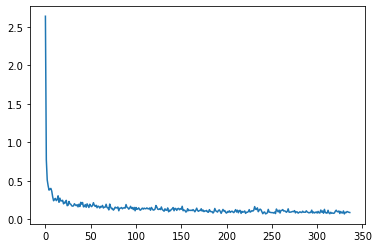

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)